In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from load_data import load_data
from annual_collision_count import annual_collision_count
from avg_monthly_collisions import avg_monthly_collisions


Load dataset into dataframe

In [2]:
df = load_data()

Select airports with the most collisions. Needed for future analysis.

In [3]:
# select top 30 airports by collisions
arpts = df['AIRPORT'].value_counts().head(30).index.to_list()

# Distribution of collisions by time of day and sky conditions

Get labels and collision counts for time of day and sky conditions

In [4]:
time_collision_counts = df['TIME_OF_DAY'].value_counts()
sky_collision_counts = df['SKY'].value_counts()

time_index = time_collision_counts.index.to_list()
time_values = time_collision_counts.values.tolist()
sky_index = sky_collision_counts.index.to_list()
sky_values = sky_collision_counts.values.tolist()

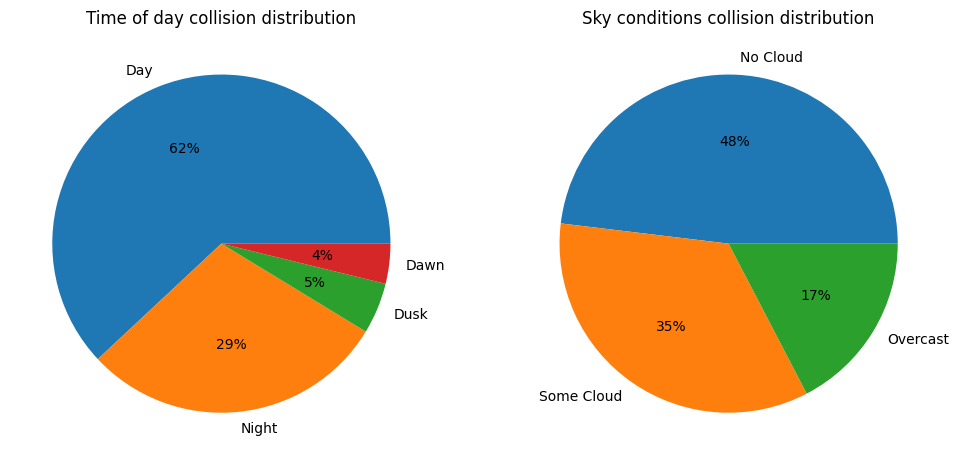

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12,8))
axes[0].pie(time_values, labels=time_index, autopct='%.0f%%')
axes[0].set_title('Time of day collision distribution')
axes[1].pie(sky_values, labels=sky_index, autopct='%.0f%%')
axes[1].set_title('Sky conditions collision distribution')

plt.show()

Most collisions occur when visibility is good. Collisions at night are lower, possibly because of fewer scheduled flights or less animal activity. Sky conditions also have little effect on collisions, possibly due to radar compensating for reduced visibility.

# Distribution of collisons by flight phase

Get phase value counts data

In [54]:
phase_count = df['PHASE_OF_FLIGHT'].value_counts()
phase_index = phase_count.index.to_list()
phase_values = phase_count.values.tolist()

Combine small categories into a single category

In [59]:
# get sum of small values
other = sum(phase_values[4:])
# remove small values and indexes from list
del phase_values[4:], phase_index[4:]
# add combined category back to lists
phase_values.append(other)
phase_index.append('Other')

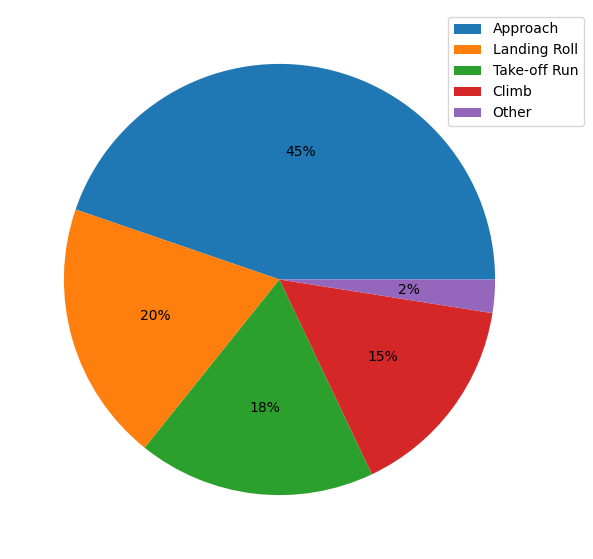

In [56]:
plt.figure(figsize=(12,7))
plt.pie(phase_values, autopct='%.0f%%')
plt.legend(phase_index, bbox_to_anchor=(.8,1))
plt.show()

Most collisions occur when aircraft are on the runway or are approaching airports. The climb and other phases of flight may have fewer collisions because airplanes are farther away from where wildlife lives.

# Annual collisions

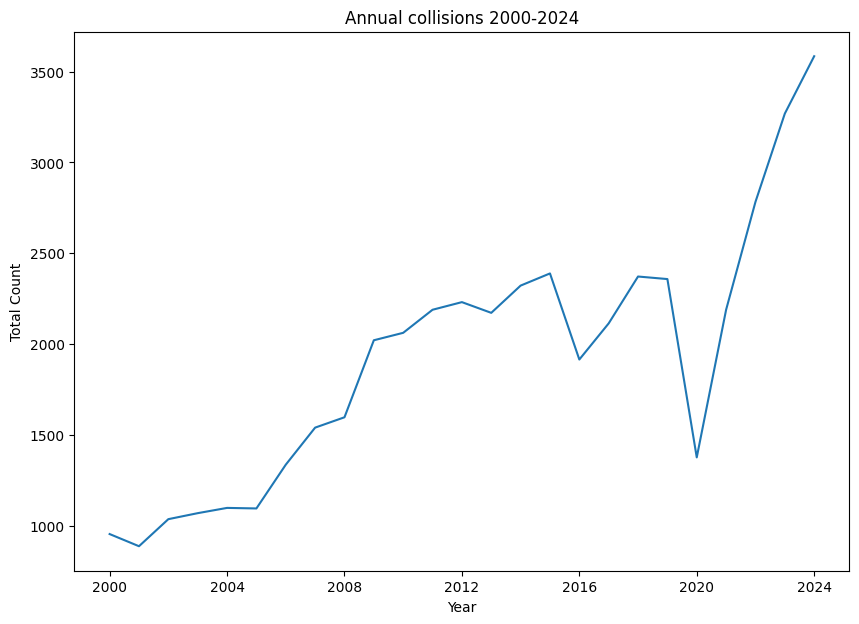

In [61]:
# dataframe for annual collisions
all_collisions = annual_collision_count(df, arpts, 2000)

plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Total Count', data=all_collisions)
plt.xticks(list(range(2000,2025,4)))
plt.title('Annual collisions 2000-2024')
plt.show()

# Annual collisions by time of day & sky condition

Load time of day data

In [49]:
day = df[df['TIME_OF_DAY'] == 'Day']
night = df[df['TIME_OF_DAY'] == 'Night']

day_data = annual_collision_count(day, arpts, 2000)
night_data = annual_collision_count(night, arpts, 2000)

Load sky conditions data

In [50]:
no_cloud = df[df['SKY'] == 'No Cloud']
some_cloud = df[df['SKY'] == 'Some Cloud']
overcast = df[df['SKY'] == 'Overcast']

no_cloud_data = annual_collision_count(no_cloud, arpts, 2000)
some_cloud_data = annual_collision_count(some_cloud, arpts, 2000)
overcast_data = annual_collision_count(overcast, arpts, 2000)

Plot data

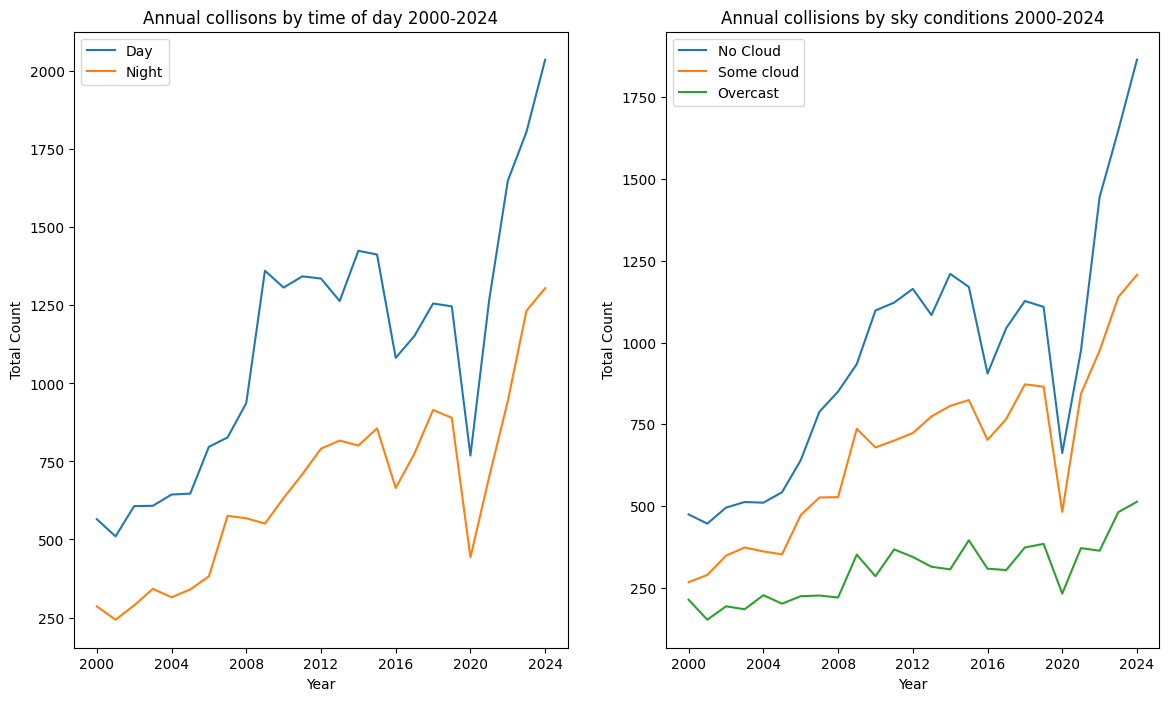

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(14,8))

# time of day plots
sns.lineplot(x='Year', y='Total Count', label='Day',
             data=day_data, ax=axes[0])
sns.lineplot(x='Year', y='Total Count', label='Night',
             data=night_data, ax=axes[0])

# sky conditions plots
sns.lineplot(x='Year', y='Total Count', label='No Cloud',
             data=no_cloud_data, ax=axes[1])
sns.lineplot(x='Year', y='Total Count', label='Some cloud',
             data=some_cloud_data, ax=axes[1])
sns.lineplot(x='Year', y='Total Count', label='Overcast',
             data=overcast_data, ax=axes[1])

# x axis formatting
axes[0].set_xticks(list(range(2000,2025,4)))
axes[1].set_xticks(list(range(2000,2025,4)))
axes[0].set_title('Annual collisons by time of day 2000-2024')
axes[1].set_title('Annual collisions by sky conditions 2000-2024')

plt.show()

The gap between day and night collisions has increased

Most collisions occur during cloudless conditions, with the least occuring during overcast conditions.

# Average monthly collisions

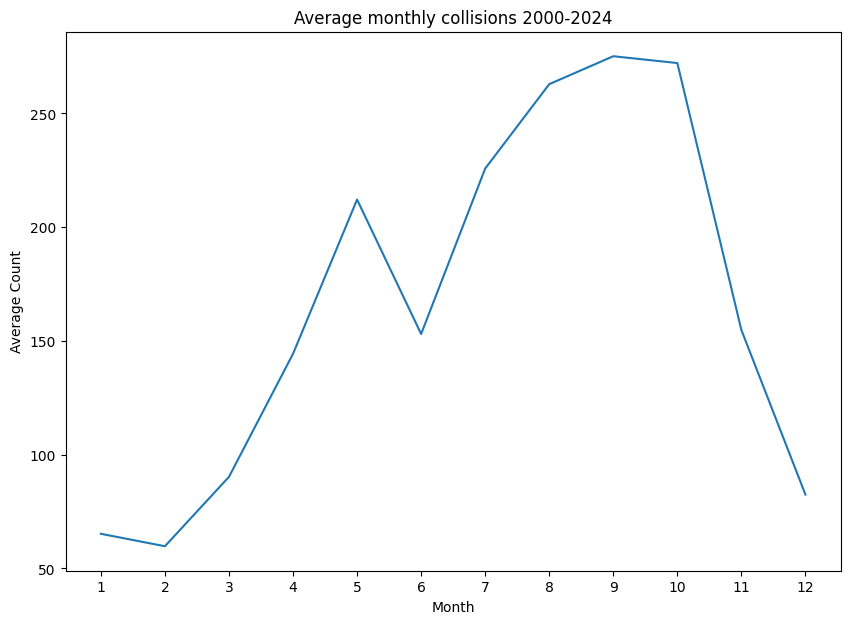

In [64]:
# dataframe for avg monthly collisions
top_arpt_data = avg_monthly_collisions(df, arpts, 2000)

plt.figure(figsize=(10,7))
sns.lineplot(x='Month', y='Average Count', data=top_arpt_data)
plt.xticks(list(range(1,13)))
plt.title("Average monthly collisions 2000-2024")
plt.show()

The most collisions occur during August, September, and October. This coincides with birds' fall migration and vacationing months.

# Annual collisions of known vs unknown species

Select top species

In [30]:
top_species = df['SPECIES'].value_counts().head(10)
print(top_species)

SPECIES
Unknown bird - small     37314
Unknown bird - medium    15794
Unknown bird              9025
Gulls                     5677
Barn swallow              4554
Mourning dove             4529
European starling         3195
Unknown bird - large      2715
Sparrows                  2664
Killdeer                  2613
Name: count, dtype: int64


Select top 3 known/unknown species

In [72]:
unk_species = top_species[:3].index.to_list()
known_species = top_species[3:6].index.to_list()

Get collision counts for each

In [73]:
unk_species_df = df[df['SPECIES'].isin(unk_species)]
unk_species_data = annual_collision_count(unk_species_df, arpts, 2000)

known_species_df = df[~df['SPECIES'].isin(known_species)]
known_species_data = annual_collision_count(known_species_df, arpts, 2000)

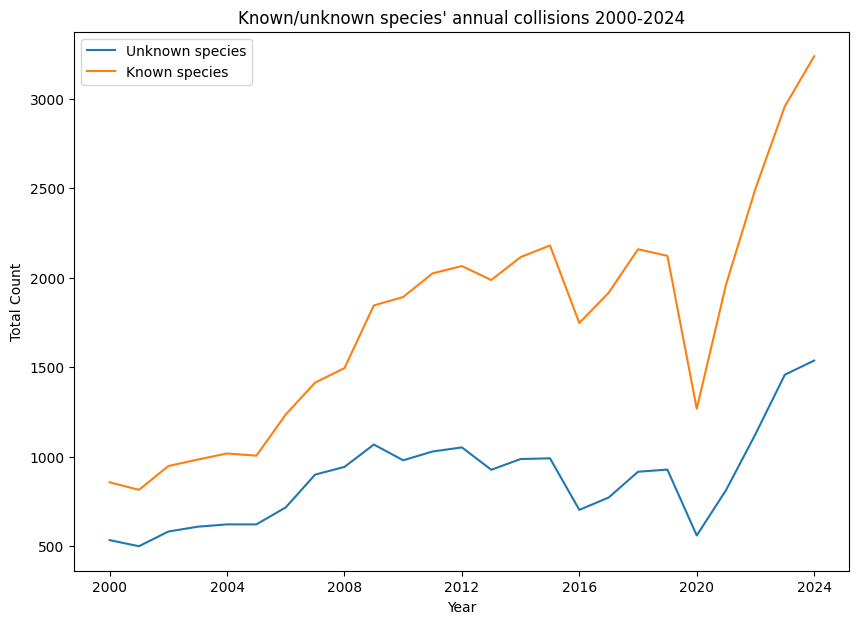

In [74]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Total Count', label='Unknown species',
             data=unk_species_data)
sns.lineplot(x='Year', y='Total Count', label='Known species',
             data=known_species_data)
plt.title("Known/unknown species' annual collisions 2000-2024")
plt.xticks(list(range(2000,2025,4)))
plt.show()

Collisions of unknown species have remained stable, compared to known species which have increased greatly. This may be due to improved methods of identification.